##**Employee Burnout Prediction**


# Информация о датасете

Перед аналитиком стоит **задача регрессии-предсказания** 'Burn Rate' - уровня профессионального выгорания сотрудников.Проанализировать, от каких факторов зависит профессональное выгорание. 

**ВХОДНЫЕ ПЕРЕМЕННЫЕ**:

**Employee ID**: The unique ID allocated for each employee (example: **fffe390032003000)**

**Date of Joining**: The date time when the employee has joined the organization (example: **2008-12-30**). *Дата начала работы в компании*.

**Gender**: The gender of the employee (**Male/Female**). Пол сотрудника.

**Company Type**: The type of company where the employee is working (**Service/Product)**.* Тип компании (Сервисная/Продуктовая)*.

**WFH Setup Available**: Is the work from home facility available for the employee (**Yes/No**). *Доступность режима удаленной работы*. Да/Нет.

**Designation**: The designation of the employee of work in the organization. In the range of [**0.0, 5.0**] bigger is higher designation.
*Занимаемая позиция (уровень иерархии) в компании*. Чем выше значение в диапазоне от 0.0 до 5.0, чем более высокую позицию занимает сотрудник. 

**Resource Allocation**: The amount of resource allocated to the employee to work, ie. number of working hours. In the range of [**1.0, 10.0**] (higher means more resource). *Доступ к ресурсам, которыми располагает сотрудник, включая количество рабочих часов.* Чем выше значение в диапазоне от 1.0 до 10.0, чем больше у сотрудника ресурсов в распоряжении.

**Mental Fatigue Score**: The level of fatigue mentally the employee is facing. In the range of [**0.0, 10.0**] where 0.0 means no fatigue and 10.0 means completely fatigue. *Уровень умственного истощения,* *усталости*, где нулевое значение == усталости нет, а 10.0 == полное истощение.

**Burn Rate**: The value we need to predict for each employee telling the rate of Bur out while working. In the range of [**0.0, 1.0**] where the higher the value is more is the burn out.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns               
import matplotlib.pyplot as plt     
%matplotlib inline
import math

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     / 22.0 MB 138 kB/s
     |████████████████████████████████| 102 kB 5.1 MB/s 
     |████████████████████████████████| 679 kB 36.9 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 9.9 MB 64.4 MB/s 
     |████████████████████████████████| 4.7 MB 59.4 MB/s 
     |████████████████████████████████| 296 kB 74.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=328711 sha256=ade1eb1f7118c611fb66168056aa94544b7bc0f622febc5828a654255bfa1577
  Stored in directory: /tmp/pip-ephem-wheel-cache-qpagb6dr/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=0ffd05f8675b056f7e6624bc5e162efc8234e857bfff752234d50fcda774acb6
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b

# ***EDA***

> 



In [ ]:
df=pd.read_table('/content/drive/MyDrive/Colab Notebooks/burnrate_train.csv', sep=',')
df

Employee ID Date of Joining  Gender Company Type  \
0      fffe32003000360033003200      2008-09-30  Female      Service   
1          fffe3700360033003500      2008-11-30    Male      Service   
2      fffe31003300320037003900      2008-03-10  Female      Product   
3      fffe32003400380032003900      2008-11-03    Male      Service   
4      fffe31003900340031003600      2008-07-24  Female      Service   
...                         ...             ...     ...          ...   
22745  fffe31003500370039003100      2008-12-30  Female      Service   
22746  fffe33003000350031003800      2008-01-19  Female      Product   
22747          fffe390032003000      2008-11-05    Male      Service   
22748  fffe33003300320036003900      2008-01-10  Female      Service   
22749      fffe3400350031003800      2008-01-06    Male      Product   

      WFH Setup Available  Designation  Resource Allocation  \
0                      No          2.0                  3.0   
1                     Yes          1.0                  2.0   
2                     Yes          2.0                  NaN   
3                     Yes          1.0                  1.0   
4                      No          3.0                  7.0   
...                   ...          ...                  ...   
22745                  No          1.0                  3.0   
22746                 Yes          3.0                  6.0   
22747                 Yes          3.0                  7.0   
22748                  No          2.0                  5.0   
22749                  No          3.0                  6.0   

       Mental Fatigue Score  Burn Rate  
0                       3.8       0.16  
1                       5.0       0.36  
2                       5.8       0.49  
3                       2.6       0.20  
4                       6.9       0.52  
...                     ...        ...  
22745                   NaN       0.41  
22746                   6.7       0.59  
22747                   NaN       0.72  
22748                   5.9       0.52  
22749                   7.8       0.61  

[22750 rows x 9 columns]

Набор данных имеет 9 значимых переменных и 22750 строк,
рассмотрим типы переменных

In [ ]:
df.dtypes

Employee ID              object
Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [ ]:
# Удалим неинформативный столбец 'Employee ID'
df=df.drop(['Employee ID'],axis=1)
df.dtypes

Date of Joining          object
Gender                   object
Company Type             object
WFH Setup Available      object
Designation             float64
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
dtype: object

In [ ]:
# проверяем наличие пропусков и нулей в датасете
print(df.isnull().sum())

Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64


In [ ]:
# уберем строки с незаполненными значениями результативной переменной
missing_target_rows = df.loc[df['Burn Rate'].isna(), :].index
df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)

In [ ]:
# заполним пропуски в столбцах медианными значениями
df['Resource Allocation'].fillna(df['Resource Allocation'].median() , inplace = True)
df['Mental Fatigue Score'].fillna(df['Mental Fatigue Score'].median() , inplace = True)
df.count()

Date of Joining         21626
Gender                  21626
Company Type            21626
WFH Setup Available     21626
Designation             21626
Resource Allocation     21626
Mental Fatigue Score    21626
Burn Rate               21626
dtype: int64

Переменная Date of Joining (начало работы в компании) не несет полезной информации. Было бы целесообразнее иметь показатель длительности работы сотрудника в компании, и посмотреть, связан ли этот показатель с переменной 'Burn Rate'.

In [ ]:
# Для этого создадим новую переменную 'Join_Date_Month', обозначающую количество проработанных месяцев в компании.
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
df['Join_Date_Month'] = df['Date of Joining'].apply(lambda x: x.month)
df = df.drop('Date of Joining', axis=1) # столбец 'Date of Joining" удалим.

In [ ]:
df.shape

(21626, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21626 entries, 0 to 21625
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                21626 non-null  object 
 1   Company Type          21626 non-null  object 
 2   WFH Setup Available   21626 non-null  object 
 3   Designation           21626 non-null  float64
 4   Resource Allocation   21626 non-null  float64
 5   Mental Fatigue Score  21626 non-null  float64
 6   Burn Rate             21626 non-null  float64
 7   Join_Date_Month       21626 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.3+ MB


In [ ]:
df['Designation'] = df['Designation'].astype('object')
df.dtypes

Gender                   object
Company Type             object
WFH Setup Available      object
Designation              object
Resource Allocation     float64
Mental Fatigue Score    float64
Burn Rate               float64
Join_Date_Month           int64
dtype: object

Рассмотрим выбросы для количественных переменных

In [ ]:
# статистика для количественных переменных
df.describe()

Resource Allocation  Mental Fatigue Score     Burn Rate  \
count         21626.000000          21626.000000  21626.000000   
mean              4.455239              5.745154      0.452005   
std               1.990000              1.833016      0.198226   
min               1.000000              0.000000      0.000000   
25%               3.000000              4.700000      0.310000   
50%               4.000000              5.900000      0.450000   
75%               6.000000              6.900000      0.590000   
max              10.000000             10.000000      1.000000   

       Join_Date_Month  
count     21626.000000  
mean          6.509017  
std           3.441459  
min           1.000000  
25%           3.000000  
50%           7.000000  
75%           9.000000  
max          12.000000

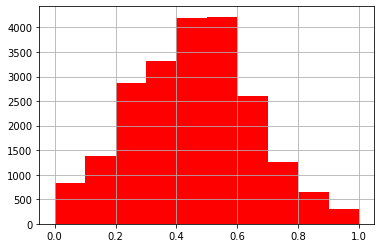

In [ ]:
# визуализируем количественные переменные
df['Burn Rate'].hist(color = 'red')

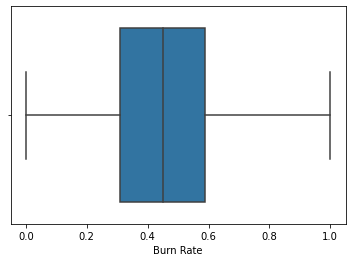

In [ ]:

sns.boxplot(x=df['Burn Rate'])

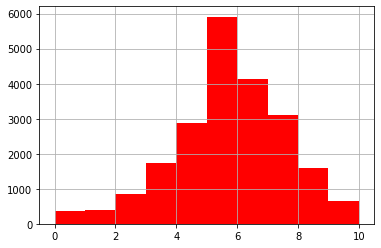

In [ ]:
df['Mental Fatigue Score'].hist(color = 'red')

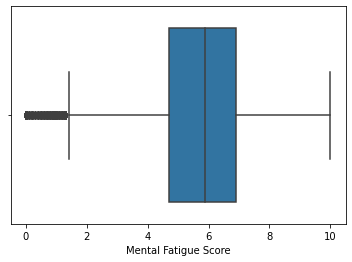

In [ ]:
sns.boxplot(x=df['Mental Fatigue Score'])

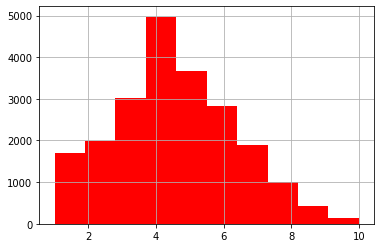

In [ ]:
df['Resource Allocation'].hist(color = 'red')

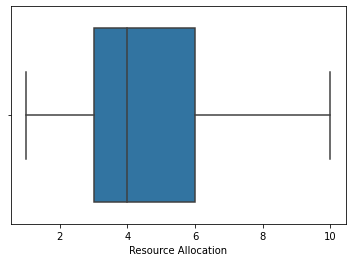

In [ ]:
sns.boxplot(x=df['Resource Allocation'])


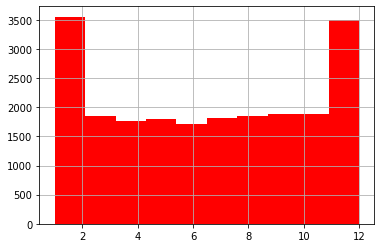

In [ ]:
df['Join_Date_Month'].hist(color = 'red')

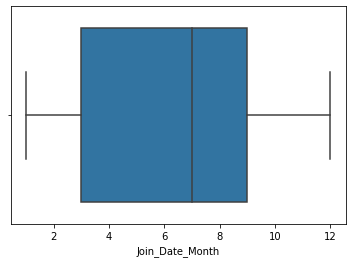

In [ ]:
sns.boxplot(x=df['Join_Date_Month'])

In [ ]:
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.5)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q2, Q3, IQR)

Resource Allocation     3.00
Mental Fatigue Score    4.70
Burn Rate               0.31
Join_Date_Month         3.00
Name: 0.25, dtype: float64 Resource Allocation     4.00
Mental Fatigue Score    5.90
Burn Rate               0.45
Join_Date_Month         7.00
Name: 0.5, dtype: float64 Resource Allocation     6.00
Mental Fatigue Score    6.90
Burn Rate               0.59
Join_Date_Month         9.00
Name: 0.75, dtype: float64 Resource Allocation     3.00
Mental Fatigue Score    2.20
Burn Rate               0.28
Join_Date_Month         6.00
dtype: float64


В целом показатели выглядят равномерно распределенными, без значительных выбросов. 

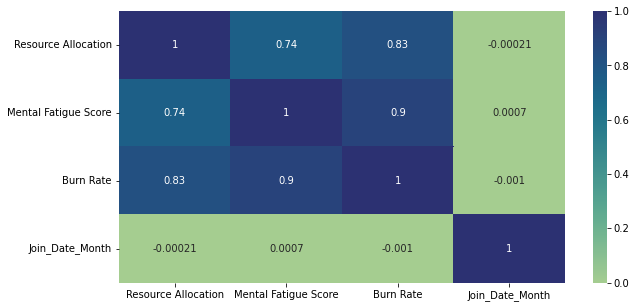

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True, cmap = 'crest')

In [ ]:
df.corr()

Resource Allocation  Mental Fatigue Score  Burn Rate  \
Resource Allocation              1.000000              0.740061   0.829632   
Mental Fatigue Score             0.740061              1.000000   0.898926   
Burn Rate                        0.829632              0.898926   1.000000   
Join_Date_Month                 -0.000211              0.000701  -0.001033   

                      Join_Date_Month  
Resource Allocation         -0.000211  
Mental Fatigue Score         0.000701  
Burn Rate                   -0.001033  
Join_Date_Month              1.000000

# **Статистика по категориальным переменным** 

In [ ]:
df.describe(include = ['object', 'bool'])

Gender Company Type WFH Setup Available  Designation
count    21626        21626               21626      21626.0
unique       2            2                   2          6.0
top     Female      Service                 Yes          2.0
freq     11349        14124               11685       7206.0

Набор наблюдений выглядит несбалансированным по признаку "Company Type".

In [ ]:
df['Company Type'].value_counts()

Service    14124
Product     7502
Name: Company Type, dtype: int64

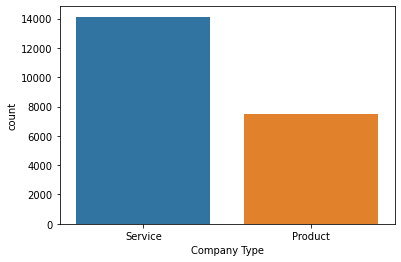

In [ ]:
fig = plt.figure()
sns.countplot(x = df['Company Type'])

Сбалансированность по столбцу 'Company_Type'. (Сотрудников сервисных компаний в датасете больше, чем сотрудников продуктовых компаний, в 2 раза). Посмотрим, как обстоят дела с признаками "Gender", "WFH Setup Available", 'Designation'.

In [ ]:
df['Designation'].value_counts()

2.0    7206
3.0    5698
1.0    4632
4.0    2275
0.0    1439
5.0     376
Name: Designation, dtype: int64

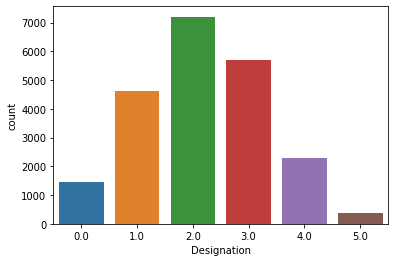

In [ ]:
fig = plt.figure()
sns.countplot(x = df['Designation'])

Сбалансированность по столбцу 'Company_Type'. (Сотрудников сервисных компаний в датасете больше, чем сотрудников продуктовых компаний, в 2 раза).  Посмотрим, как обстоят дела с признаками "Gender", "WFH Setup Available", 'Designation'. 

In [ ]:
# Gender
df['Gender'].value_counts()

Female    11349
Male      10277
Name: Gender, dtype: int64

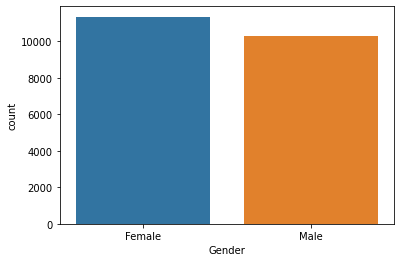

In [ ]:
fig = plt.figure()
sns.countplot(x = df['Gender'])

In [ ]:
# WFH Setup Available
df['WFH Setup Available'].value_counts()

Yes    11685
No      9941
Name: WFH Setup Available, dtype: int64

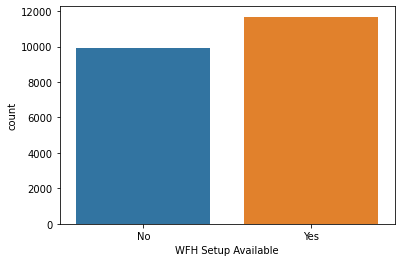

In [ ]:
fig = plt.figure()
sns.countplot(x = df['WFH Setup Available'])

Перменные 'Gender", "WFH Setup Available", 'Designation' являются сбалансированными.

#Кодирование категориальных признаков#


In [ ]:
# заменим в исходном наборе данных df категориальные переменные на фиктивные (dummi- переменные), принимающие значения "0" и "1"
# получим новый датафрейм - df1
df1=pd.get_dummies(df)
df1

Resource Allocation  Mental Fatigue Score  Burn Rate  Join_Date_Month  \
0                      3.0                   3.8       0.16                9   
1                      2.0                   5.0       0.36               11   
2                      4.0                   5.8       0.49                3   
3                      1.0                   2.6       0.20               11   
4                      7.0                   6.9       0.52                7   
...                    ...                   ...        ...              ...   
21621                  3.0                   5.9       0.41               12   
21622                  6.0                   6.7       0.59                1   
21623                  7.0                   5.9       0.72               11   
21624                  5.0                   5.9       0.52                1   
21625                  6.0                   7.8       0.61                1   

       Gender_Female  Gender_Male  Company Type_Product  Company Type_Service  \
0                  1            0                     0                     1   
1                  0            1                     0                     1   
2                  1            0                     1                     0   
3                  0            1                     0                     1   
4                  1            0                     0                     1   
...              ...          ...                   ...                   ...   
21621              1            0                     0                     1   
21622              1            0                     1                     0   
21623              0            1                     0                     1   
21624              1            0                     0                     1   
21625              0            1                     1                     0   

       WFH Setup Available_No  WFH Setup Available_Yes  Designation_0.0  \
0                           1                        0                0   
1                           0                        1                0   
2                           0                        1                0   
3                           0                        1                0   
4                           1                        0                0   
...                       ...                      ...              ...   
21621                       1                        0                0   
21622                       0                        1                0   
21623                       0                        1                0   
21624                       1                        0                0   
21625                       1                        0                0   

       Designation_1.0  Designation_2.0  Designation_3.0  Designation_4.0  \
0                    0                1                0                0   
1                    1                0                0                0   
2                    0                1                0                0   
3                    1                0                0                0   
4                    0                0                1                0   
...                ...              ...              ...              ...   
21621                1                0                0                0   
21622                0                0                1                0   
21623                0                0                1                0   
21624                0                1                0                0   
21625                0                0                1                0   

       Designation_5.0  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
21621                0  
21622                0  
21623                0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [ ]:
 from sklearn import preprocessing
 import numpy as np

Нормализация признаков с целью подготовки датасета для построения модели

In [ ]:
features_to_normalize =['Resource Allocation','Mental Fatigue Score', 'Burn Rate']
# could be ['A','B'] 
df1[features_to_normalize] = df1[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
df1

Resource Allocation  Mental Fatigue Score  Burn Rate  Join_Date_Month  \
0                 0.222222                  0.38       0.16                9   
1                 0.111111                  0.50       0.36               11   
2                 0.333333                  0.58       0.49                3   
3                 0.000000                  0.26       0.20               11   
4                 0.666667                  0.69       0.52                7   
...                    ...                   ...        ...              ...   
21621             0.222222                  0.59       0.41               12   
21622             0.555556                  0.67       0.59                1   
21623             0.666667                  0.59       0.72               11   
21624             0.444444                  0.59       0.52                1   
21625             0.555556                  0.78       0.61                1   

       Gender_Female  Gender_Male  Company Type_Product  Company Type_Service  \
0                  1            0                     0                     1   
1                  0            1                     0                     1   
2                  1            0                     1                     0   
3                  0            1                     0                     1   
4                  1            0                     0                     1   
...              ...          ...                   ...                   ...   
21621              1            0                     0                     1   
21622              1            0                     1                     0   
21623              0            1                     0                     1   
21624              1            0                     0                     1   
21625              0            1                     1                     0   

       WFH Setup Available_No  WFH Setup Available_Yes  Designation_0.0  \
0                           1                        0                0   
1                           0                        1                0   
2                           0                        1                0   
3                           0                        1                0   
4                           1                        0                0   
...                       ...                      ...              ...   
21621                       1                        0                0   
21622                       0                        1                0   
21623                       0                        1                0   
21624                       1                        0                0   
21625                       1                        0                0   

       Designation_1.0  Designation_2.0  Designation_3.0  Designation_4.0  \
0                    0                1                0                0   
1                    1                0                0                0   
2                    0                1                0                0   
3                    1                0                0                0   
4                    0                0                1                0   
...                ...              ...              ...              ...   
21621                1                0                0                0   
21622                0                0                1                0   
21623                0                0                1                0   
21624                0                1                0                0   
21625                0                0                1                0   

       Designation_5.0  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
21621                0  
21622                0  
21623                0

Подготовка набора наблюдений df1 завершена


In [ ]:
df1.corr()

Resource Allocation  Mental Fatigue Score  Burn Rate  \
Resource Allocation                 1.000000              0.740061   0.829632   
Mental Fatigue Score                0.740061              1.000000   0.898926   
Burn Rate                           0.829632              0.898926   1.000000   
Join_Date_Month                    -0.000211              0.000701  -0.001033   
Gender_Female                      -0.136407             -0.139104  -0.154895   
Gender_Male                         0.136407              0.139104   0.154895   
Company Type_Product               -0.007235             -0.002631  -0.004281   
Company Type_Service                0.007235              0.002631   0.004281   
WFH Setup Available_No              0.276793              0.263712   0.306266   
WFH Setup Available_Yes            -0.276793             -0.263712  -0.306266   
Designation_0.0                    -0.414356             -0.408603  -0.405412   
Designation_1.0                    -0.468792             -0.331643  -0.378934   
Designation_2.0                    -0.100886             -0.022199  -0.058963   
Designation_3.0                     0.356534              0.264790   0.281987   
Designation_4.0                     0.480811              0.340745   0.405950   
Designation_5.0                     0.295085              0.207852   0.271773   

                         Join_Date_Month  Gender_Female  Gender_Male  \
Resource Allocation            -0.000211      -0.136407     0.136407   
Mental Fatigue Score            0.000701      -0.139104     0.139104   
Burn Rate                      -0.001033      -0.154895     0.154895   
Join_Date_Month                 1.000000      -0.000318     0.000318   
Gender_Female                  -0.000318       1.000000    -1.000000   
Gender_Male                     0.000318      -1.000000     1.000000   
Company Type_Product           -0.002022      -0.011660     0.011660   
Company Type_Service            0.002022       0.011660    -0.011660   
WFH Setup Available_No          0.002881      -0.073740     0.073740   
WFH Setup Available_Yes        -0.002881       0.073740    -0.073740   
Designation_0.0                 0.009086       0.046752    -0.046752   
Designation_1.0                -0.007198       0.073623    -0.073623   
Designation_2.0                 0.000200       0.003811    -0.003811   
Designation_3.0                -0.002360      -0.036621     0.036621   
Designation_4.0                 0.008496      -0.082357     0.082357   
Designation_5.0                -0.007442      -0.017228     0.017228   

                         Company Type_Product  Company Type_Service  \
Resource Allocation                 -0.007235              0.007235   
Mental Fatigue Score                -0.002631              0.002631   
Burn Rate                           -0.004281              0.004281   
Join_Date_Month                     -0.002022              0.002022   
Gender_Female                       -0.011660              0.011660   
Gender_Male                          0.011660             -0.011660   
Company Type_Product                 1.000000             -1.000000   
Company Type_Service                -1.000000              1.000000   
WFH Setup Available_No               0.003410             -0.003410   
WFH Setup Available_Yes             -0.003410              0.003410   
Designation_0.0                      0.016299             -0.016299   
Designation_1.0                     -0.004458              0.004458   
Designation_2.0                     -0.005511              0.005511   
Designation_3.0                      0.005597             -0.005597   
Designation_4.0                     -0.008610              0.008610   
Designation_5.0                      0.004137             -0.004137   

                         WFH Setup Available_No  WFH Setup Available_Yes  \
Resource Allocation                    0.276793                -0.276793   
Mental Fatigue Score                   0.263712               

In [ ]:
df2=df1[['Resource Allocation','Mental Fatigue Score','Burn Rate']]

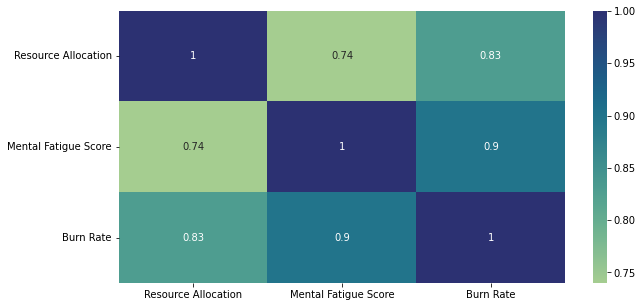

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(df2.corr(),annot = True, cmap = 'crest')

Корреляционная матрица показывает, что результативная переменная 'Burn Rate' очень сильно связана с 'Mental Fatique Score' (уровень усталости, истощения) и имеет выраженную связь с 'Resource Allocation' (распоряжение ресурсами).

In [ ]:
!pip install -U dataprep


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 5.1 MB/s 
     |████████████████████████████████| 133 kB 60.7 MB/s 
     |████████████████████████████████| 1.0 MB 58.3 MB/s 
     |████████████████████████████████| 764 kB 77.1 MB/s 
     |████████████████████████████████| 1.0 MB 71.5 MB/s 
     |████████████████████████████████| 1.3 MB 56.9 MB/s 
     |████████████████████████████████| 33.8 MB 230 kB/s 
     |████████████████████████████████| 101 kB 8.5 MB/s 
     |████████████████████████████████| 1.1 MB 45.9 MB/s 
     |████████████████████████████████| 2.2 MB 48.7 MB/s 
     |████████████████████████████████| 232 kB 50.8 MB/s 
     |████████████████████████████████| 96 kB 5.4 MB/s 
     |████████████████████████████████| 1.6 MB 67.9 MB/s 
     |████████████████████████████████| 49 kB 4.0 MB/s 
     |████████████████████████████████| 133 kB 52.9 MB/s 
  Created wheel for metaphone: filena

#Построение модели RandomForestRegressor

> 



In [ ]:
# прежде чем перейти к построению модели, уберем из датасета результативную переменную
X=df1.drop(['Burn Rate'], axis=1)
y=df1['Burn Rate']
df1

Resource Allocation  Mental Fatigue Score  Burn Rate  Join_Date_Month  \
0                 0.222222                  0.38       0.16                9   
1                 0.111111                  0.50       0.36               11   
2                 0.333333                  0.58       0.49                3   
3                 0.000000                  0.26       0.20               11   
4                 0.666667                  0.69       0.52                7   
...                    ...                   ...        ...              ...   
21621             0.222222                  0.59       0.41               12   
21622             0.555556                  0.67       0.59                1   
21623             0.666667                  0.59       0.72               11   
21624             0.444444                  0.59       0.52                1   
21625             0.555556                  0.78       0.61                1   

       Gender_Female  Gender_Male  Company Type_Product  Company Type_Service  \
0                  1            0                     0                     1   
1                  0            1                     0                     1   
2                  1            0                     1                     0   
3                  0            1                     0                     1   
4                  1            0                     0                     1   
...              ...          ...                   ...                   ...   
21621              1            0                     0                     1   
21622              1            0                     1                     0   
21623              0            1                     0                     1   
21624              1            0                     0                     1   
21625              0            1                     1                     0   

       WFH Setup Available_No  WFH Setup Available_Yes  Designation_0.0  \
0                           1                        0                0   
1                           0                        1                0   
2                           0                        1                0   
3                           0                        1                0   
4                           1                        0                0   
...                       ...                      ...              ...   
21621                       1                        0                0   
21622                       0                        1                0   
21623                       0                        1                0   
21624                       1                        0                0   
21625                       1                        0                0   

       Designation_1.0  Designation_2.0  Designation_3.0  Designation_4.0  \
0                    0                1                0                0   
1                    1                0                0                0   
2                    0                1                0                0   
3                    1                0                0                0   
4                    0                0                1                0   
...                ...              ...              ...              ...   
21621                1                0                0                0   
21622                0                0                1                0   
21623                0                0                1                0   
21624                0                1                0                0   
21625                0                0                1                0   

       Designation_5.0  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
21621                0  
21622                0  
21623                0

In [ ]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
forest_model = RandomForestRegressor(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)


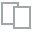
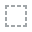
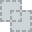
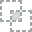
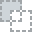
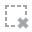
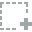
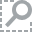
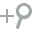
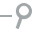
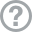
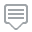
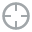
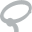
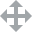
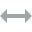
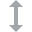
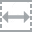
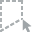
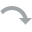
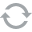
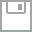
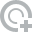
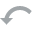
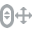
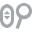
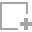
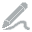
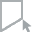
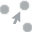
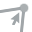
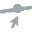

In [ ]:
# будем считать, что датасеты сбалансированы по всем переменным и на обучающей, и на тестовой выборках

from dataprep.eda import plot_diff
plot_diff([X_train, X_test])



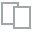
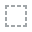
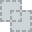
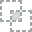
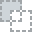
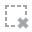
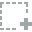
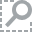
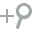
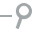
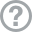
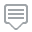
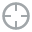
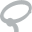
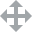
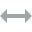
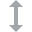
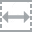
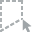
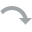
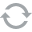
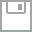
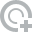
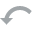
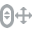
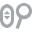
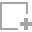
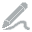
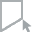
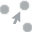
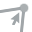
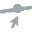

In [ ]:
plot_diff([y_train, y_test])

In [ ]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
# Score на обучающей выборе    
score = forest_model.score(X_train, y_train)
print("Score: "+ str(score))

Score: 0.9706350335663376


In [ ]:
# Score на тестовой выборке
score = forest_model.score(X_test, y_test)
print("Score: "+ str(score))

Score: 0.886728987017595


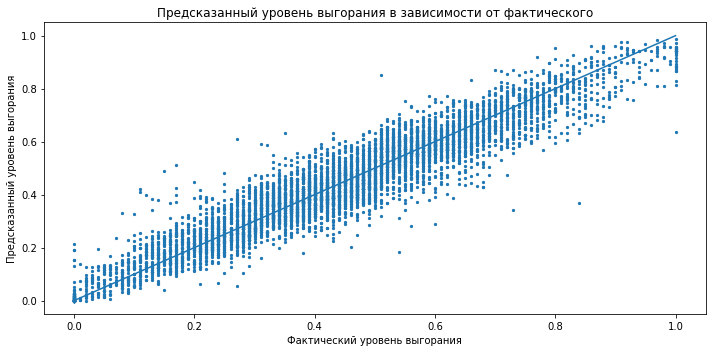

In [ ]:
y_pred=forest_model.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=5)
plt.title('Предсказанный уровень выгорания в зависимости от фактического')
plt.xlabel('Фактический уровень выгорания')
plt.ylabel('Предсказанный уровень выгорания')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

Значимость изучаемых факторов по убыванию: Mental Fatique Score - Уровень усталости, истощения,  Recourse Allocation - Распоряжение ресурсами, Join Date_Month - Продолжительность работы в компании (в мес.), Designation - Уровень позиции. 

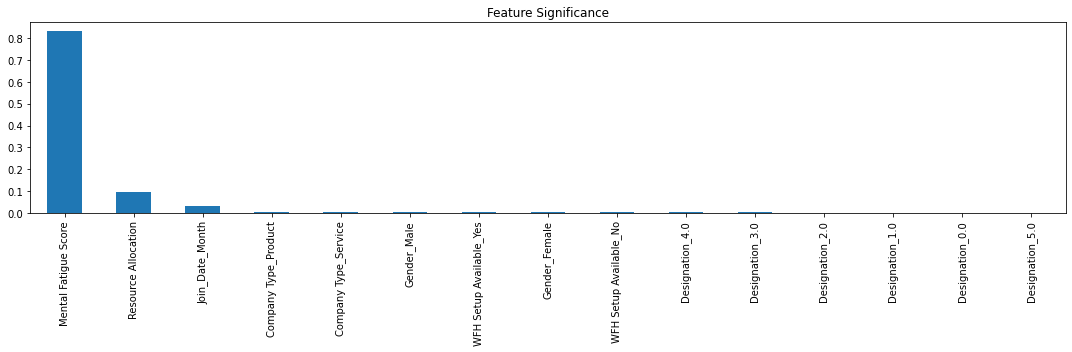

In [ ]:
# Тренируем модель на обучающей выборке
forest_model.fit(X_train, y_train)
# Получаем коэффициент значимости переменных
coef = pd.Series(forest_model.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(15, 5))
coef.head(30).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

In [ ]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)# подгонка модели к данным
rf_pre =rf.predict(X_test) # прогноз уровня выгорания на X_test

In [ ]:
print('Точность Random Forest Regressor : ')
crossr = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 4,verbose = 0)
mser = mean_squared_error(y_test, rf_pre)
rmser = mean_squared_error(y_test, rf_pre)**0.5
maer = mean_absolute_error(y_test, rf_pre)
r2r = r2_score(y_test, rf_pre)

print('Cross val     : ',crossr)
print('R2            : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

Точность Random Forest Regressor : 
Cross val     :  [0.88289578 0.88674699 0.88519528 0.88396575]
R2            :  0.8869005138773842
MAE           :  0.05131039008193718
MSE (RMSE)    :  0.004494916563850218  ( 0.06704413892243093 )


# **Построение модели LinearRegression**
Для каждой категориальной переменной в модель может входить на 1 категорию меньше. Выберем в качестве базовых категорий:'Gender_Male', 'WFH Setup Available_Yes', Company Type_Service'. Удалив перечисленные переменные, получим набор данных df3

In [ ]:
df3=df1.drop(['Gender_Male', 'WFH Setup Available_Yes', 'Company Type_Service', 'Designation_0.0'],axis=1)
df3


Resource Allocation  Mental Fatigue Score  Burn Rate  Join_Date_Month  \
0                 0.222222                  0.38       0.16                9   
1                 0.111111                  0.50       0.36               11   
2                 0.333333                  0.58       0.49                3   
3                 0.000000                  0.26       0.20               11   
4                 0.666667                  0.69       0.52                7   
...                    ...                   ...        ...              ...   
21621             0.222222                  0.59       0.41               12   
21622             0.555556                  0.67       0.59                1   
21623             0.666667                  0.59       0.72               11   
21624             0.444444                  0.59       0.52                1   
21625             0.555556                  0.78       0.61                1   

       Gender_Female  Company Type_Product  WFH Setup Available_No  \
0                  1                     0                       1   
1                  0                     0                       0   
2                  1                     1                       0   
3                  0                     0                       0   
4                  1                     0                       1   
...              ...                   ...                     ...   
21621              1                     0                       1   
21622              1                     1                       0   
21623              0                     0                       0   
21624              1                     0                       1   
21625              0                     1                       1   

       Designation_1.0  Designation_2.0  Designation_3.0  Designation_4.0  \
0                    0                1                0                0   
1                    1                0                0                0   
2                    0                1                0                0   
3                    1                0                0                0   
4                    0                0                1                0   
...                ...              ...              ...              ...   
21621                1                0                0                0   
21622                0                0                1                0   
21623                0                0                1                0   
21624                0                1                0                0   
21625                0                0                1                0   

       Designation_5.0  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
21621                0  
21622                0  
21623                0  
21624                0  
21625                0  

[21626 rows x 12 columns]

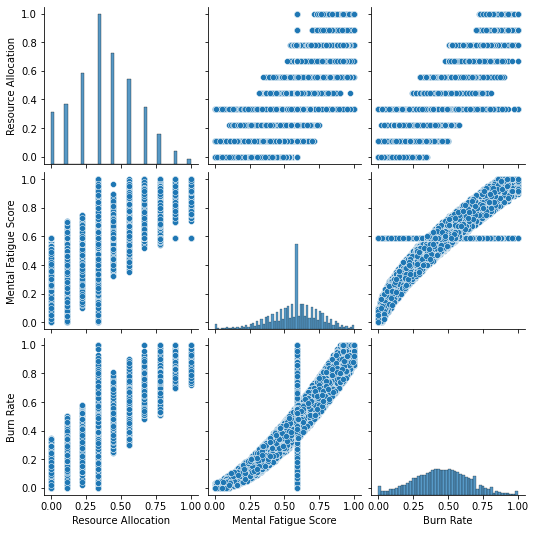

In [ ]:
sns.pairplot(data=df2)

In [ ]:
# Change n_estimators = 100 because give score > .9
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#import from sklearn.linear_model r2_score
from sklearn.model_selection import train_test_split

In [ ]:
X1=df3.drop(['Burn Rate'], axis=1)
y1=df3['Burn Rate']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=5)

In [ ]:
regr = LinearRegression()
regr.fit(X1_train, y1_train)
regr.coef_
# Make predictions using the testing set
y1_pred = regr.predict(X1_test)
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y1_test, y1_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y1_test, y1_pred))


Coefficients: 
 [ 2.74417977e-01  6.72088876e-01 -4.62030590e-05 -6.86545217e-03
  9.07374793e-04  1.72853439e-02  8.13874535e-03  1.43539538e-02
  1.76763182e-02  4.02311956e-02  9.31353978e-02]
Mean squared error: 0.00
Coefficient of determination: 0.87


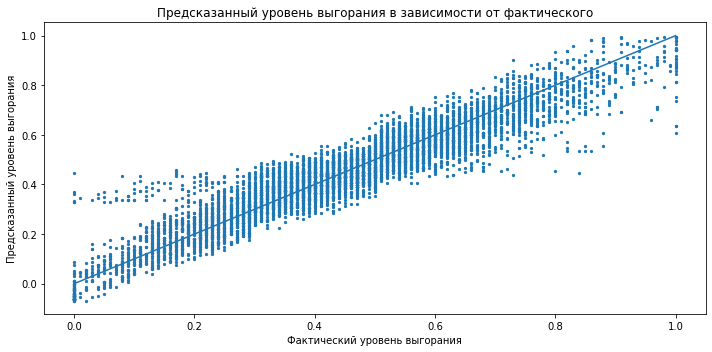

In [ ]:
y_pred=regr.predict(X1_test)
plt.figure(figsize=(10, 5))
plt.scatter(y1_test, y1_pred, s=5)
plt.title('Предсказанный уровень выгорания в зависимости от фактического')
plt.xlabel('Фактический уровень выгорания')
plt.ylabel('Предсказанный уровень выгорания')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)])
plt.tight_layout()

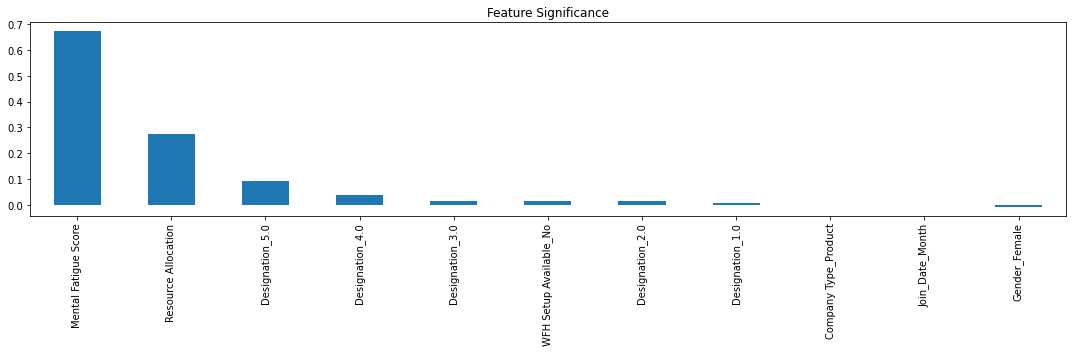

In [ ]:
# Тренируем модель на обучающей выборке
regr.fit(X1_train, y1_train)
# Получим коэффициенты значимости переменных
coef = pd.Series(regr.coef_, index = X1_train.columns).sort_values(ascending=False)
plt.figure(figsize=(15, 5))
coef.head(30).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

In [ ]:
#print(X1_train)

In [ ]:
# Score на обучающей выборе    
score = regr.score(X1_train, y1_train)
print("Score: "+ str(score))

Score: 0.870729895125234


In [ ]:
# Score на тестовой выборке
score = regr.score(X1_test, y1_test)
print("Score: "+ str(score))

Score: 0.8747052507129789


In [ ]:
#Контролируемое обучение
reg = LinearRegression()
reg.fit(X_train, y_train) # подгонка модели к данным
lin_y_pred=reg.predict(X_test) # прогноз уровня выгорания на X_test

In [ ]:
print('Точность линейной регресии: ')
crossl = cross_val_score(estimator = reg, X = X_train, y = y_train, cv = 4,verbose = 0)
msel = mean_squared_error(y_test, lin_y_pred)
rmsel = mean_squared_error(y_test, lin_y_pred)**0.5
mael = mean_absolute_error(y_test, lin_y_pred)
r2l = r2_score(y_test, lin_y_pred)

print('Cross val     : ',crossl)
print('R2            : ', r2l)
print('MAE           : ', mael)
print('MSE (RMSE)    : ', msel,' (',rmsel,')')

Точность линейной регресии: 
Cross val     :  [0.86960308 0.86999154 0.8722476  0.86973561]
R2            :  0.8747052507129789
MAE           :  0.05352016870675267
MSE (RMSE)    :  0.004979593305341056  ( 0.07056623346432099 )


# **Построение модели GBM **

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [ ]:
reg2 = GradientBoostingRegressor(random_state=0)
reg2.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
reg2.predict(X_test)

array([0.34261127, 0.63071451, 0.41185974, ..., 0.58511375, 0.58826871,
       0.37362688])

In [ ]:
reg2.score(X_test, y_test)

0.9020708202333698

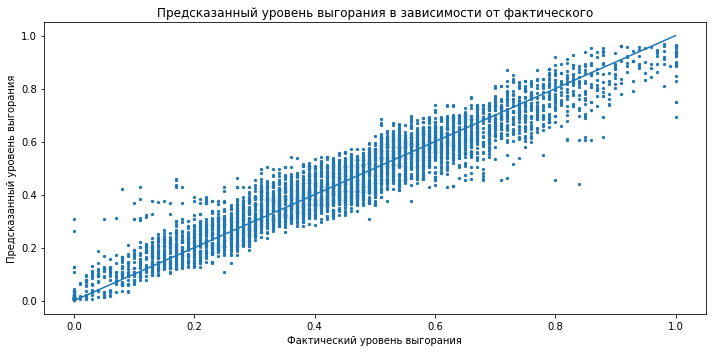

In [ ]:
y_pred=reg2.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=5)
plt.title('Предсказанный уровень выгорания в зависимости от фактического')
plt.xlabel('Фактический уровень выгорания')
plt.ylabel('Предсказанный уровень выгорания')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.tight_layout()

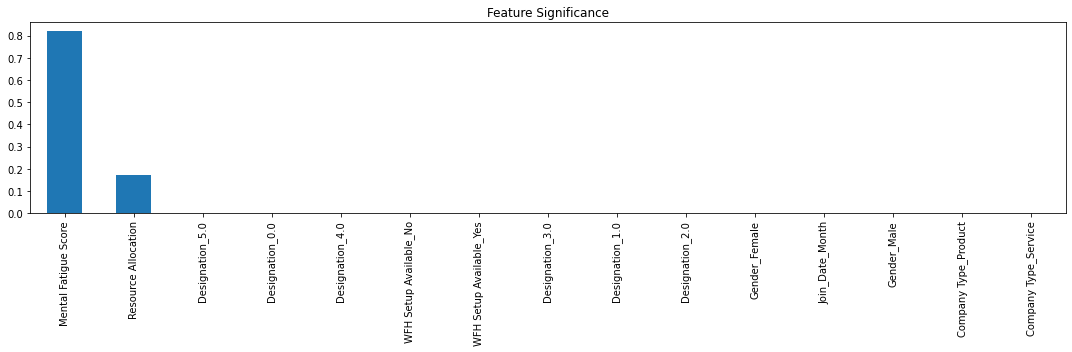

In [ ]:
# Тренируем модель на обучающей выборке
reg2.fit(X_train, y_train)
# Получим коэффициент значимости переменных
coef = pd.Series(reg2.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(15, 5))
coef.head(30).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

In [ ]:
# Score на обучающей выборке    
score = reg2.score(X_train, y_train)
print("Score: "+ str(score))

Score: 0.9044656990752988


In [ ]:
# Score на тестовой выборке
score = reg2.score(X_test, y_test)
print("Score: "+ str(score))

Score: 0.9020708202333698


In [ ]:
df2

Resource Allocation  Mental Fatigue Score  Burn Rate
0                 0.222222                  0.38       0.16
1                 0.111111                  0.50       0.36
2                 0.333333                  0.58       0.49
3                 0.000000                  0.26       0.20
4                 0.666667                  0.69       0.52
...                    ...                   ...        ...
21621             0.222222                  0.59       0.41
21622             0.555556                  0.67       0.59
21623             0.666667                  0.59       0.72
21624             0.444444                  0.59       0.52
21625             0.555556                  0.78       0.61

[21626 rows x 3 columns]

In [ ]:
df1

Resource Allocation  Mental Fatigue Score  Burn Rate  Join_Date_Month  \
0                 0.222222                  0.38       0.16                9   
1                 0.111111                  0.50       0.36               11   
2                 0.333333                  0.58       0.49                3   
3                 0.000000                  0.26       0.20               11   
4                 0.666667                  0.69       0.52                7   
...                    ...                   ...        ...              ...   
21621             0.222222                  0.59       0.41               12   
21622             0.555556                  0.67       0.59                1   
21623             0.666667                  0.59       0.72               11   
21624             0.444444                  0.59       0.52                1   
21625             0.555556                  0.78       0.61                1   

       Gender_Female  Gender_Male  Company Type_Product  Company Type_Service  \
0                  1            0                     0                     1   
1                  0            1                     0                     1   
2                  1            0                     1                     0   
3                  0            1                     0                     1   
4                  1            0                     0                     1   
...              ...          ...                   ...                   ...   
21621              1            0                     0                     1   
21622              1            0                     1                     0   
21623              0            1                     0                     1   
21624              1            0                     0                     1   
21625              0            1                     1                     0   

       WFH Setup Available_No  WFH Setup Available_Yes  Designation_0.0  \
0                           1                        0                0   
1                           0                        1                0   
2                           0                        1                0   
3                           0                        1                0   
4                           1                        0                0   
...                       ...                      ...              ...   
21621                       1                        0                0   
21622                       0                        1                0   
21623                       0                        1                0   
21624                       1                        0                0   
21625                       1                        0                0   

       Designation_1.0  Designation_2.0  Designation_3.0  Designation_4.0  \
0                    0                1                0                0   
1                    1                0                0                0   
2                    0                1                0                0   
3                    1                0                0                0   
4                    0                0                1                0   
...                ...              ...              ...              ...   
21621                1                0                0                0   
21622                0                0                1                0   
21623                0                0                1                0   
21624                0                1                0                0   
21625                0                0                1                0   

       Designation_5.0  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
21621                0  
21622                0  
21623                0

In [ ]:
df3

Resource Allocation  Mental Fatigue Score  Burn Rate  Join_Date_Month  \
0                 0.222222                  0.38       0.16                9   
1                 0.111111                  0.50       0.36               11   
2                 0.333333                  0.58       0.49                3   
3                 0.000000                  0.26       0.20               11   
4                 0.666667                  0.69       0.52                7   
...                    ...                   ...        ...              ...   
21621             0.222222                  0.59       0.41               12   
21622             0.555556                  0.67       0.59                1   
21623             0.666667                  0.59       0.72               11   
21624             0.444444                  0.59       0.52                1   
21625             0.555556                  0.78       0.61                1   

       Gender_Female  Company Type_Product  WFH Setup Available_No  \
0                  1                     0                       1   
1                  0                     0                       0   
2                  1                     1                       0   
3                  0                     0                       0   
4                  1                     0                       1   
...              ...                   ...                     ...   
21621              1                     0                       1   
21622              1                     1                       0   
21623              0                     0                       0   
21624              1                     0                       1   
21625              0                     1                       1   

       Designation_1.0  Designation_2.0  Designation_3.0  Designation_4.0  \
0                    0                1                0                0   
1                    1                0                0                0   
2                    0                1                0                0   
3                    1                0                0                0   
4                    0                0                1                0   
...                ...              ...              ...              ...   
21621                1                0                0                0   
21622                0                0                1                0   
21623                0                0                1                0   
21624                0                1                0                0   
21625                0                0                1                0   

       Designation_5.0  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
21621                0  
21622                0  
21623                0  
21624                0  
21625                0  

[21626 rows x 12 columns]

# **`Построение модели CATBOOST`**


In [ ]:
!pip install catboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostRegressor, Pool, metrics, cv
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=5)

In [ ]:
model = CatBoostRegressor()


In [ ]:
model.fit(X_train, y_train)


Learning rate set to 0.062897
0:	learn: 0.1879015	total: 50ms	remaining: 49.9s
1:	learn: 0.1786443	total: 52.9ms	remaining: 26.4s
2:	learn: 0.1700238	total: 55.9ms	remaining: 18.6s
3:	learn: 0.1619216	total: 58.7ms	remaining: 14.6s
4:	learn: 0.1548069	total: 61.5ms	remaining: 12.2s
5:	learn: 0.1476721	total: 64.4ms	remaining: 10.7s
6:	learn: 0.1411098	total: 67.1ms	remaining: 9.52s
7:	learn: 0.1351170	total: 69.8ms	remaining: 8.65s
8:	learn: 0.1292791	total: 72.5ms	remaining: 7.98s
9:	learn: 0.1241282	total: 75.1ms	remaining: 7.44s
10:	learn: 0.1192478	total: 77.8ms	remaining: 6.99s
11:	learn: 0.1147589	total: 80.5ms	remaining: 6.63s
12:	learn: 0.1105893	total: 83.3ms	remaining: 6.32s
13:	learn: 0.1067616	total: 86ms	remaining: 6.06s
14:	learn: 0.1032512	total: 88.7ms	remaining: 5.83s
15:	learn: 0.0999726	total: 91.5ms	remaining: 5.63s
16:	learn: 0.0968050	total: 94.6ms	remaining: 5.47s
17:	learn: 0.0939508	total: 97.3ms	remaining: 5.31s
18:	learn: 0.0913641	total: 100ms	remaining: 5.1

In [ ]:
# Score на обучающей выборке    
score = model.score(X_train, y_train)
print("Score: "+ str(score))

Score: 0.9199904988007245


In [ ]:
# Score на тестовой выборке    
score = model.score(X_test, y_test)
print("Score: "+ str(score))

Score: 0.9064938097207461


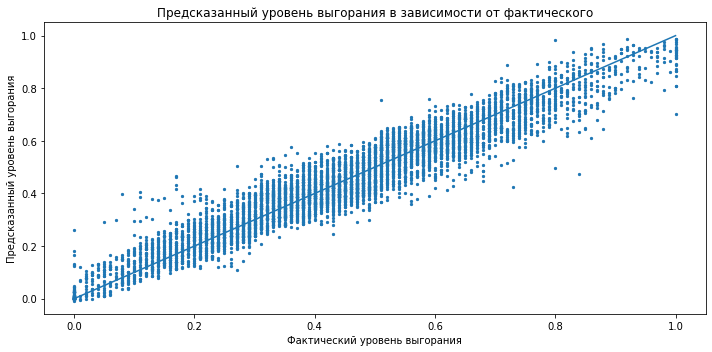

In [ ]:
y_pred=model.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, s=5)
plt.title('Предсказанный уровень выгорания в зависимости от фактического')
plt.xlabel('Фактический уровень выгорания')
plt.ylabel('Предсказанный уровень выгорания')
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)])
plt.tight_layout()

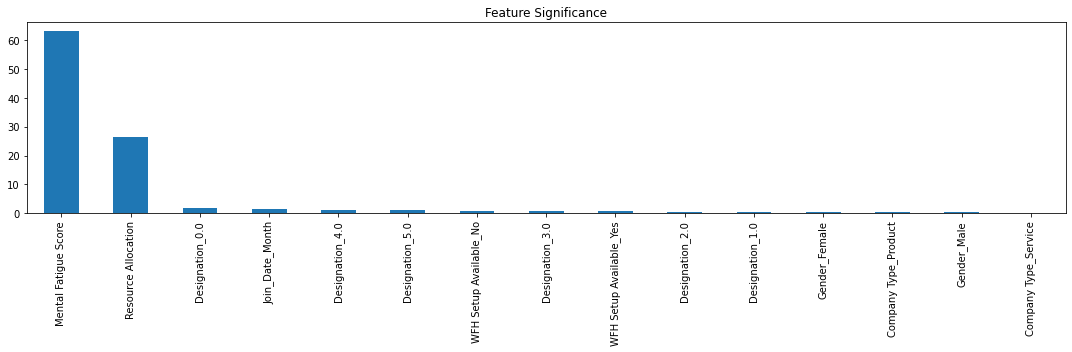

In [ ]:
# Тренируем модель на обучающей выборке
#model.fit(X_train, y_train)
# Получим коэффициенты значимости переменных
coef = pd.Series(model.feature_importances_, index = X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(15, 5))
coef.head(30).plot(kind='bar')
plt.title('Feature Significance')
plt.tight_layout()

# Построение модели XGBoost

In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb
data_dmatrix_2 = xgb.DMatrix(data=X_train,label=y_train)

In [ ]:
xg_reg = xgb.XGBRegressor(colsample_bytree = 0.9, learning_rate = 0.1,
max_depth = 5, alpha = 10, n_estimators = 150)

In [ ]:
xg_reg.fit(X_train,y_train)

[14:58:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.9, max_depth=5, n_estimators=150)

In [ ]:
preds_1 = xg_reg.predict( X_train)

In [ ]:
# print metrics on train data
from sklearn.metrics import r2_score
print("The R-squared value is: {0:0.4f} \n".format(r2_score(preds_1,y_train)))

The R-squared value is: 0.9065 



In [ ]:
preds_2 = xg_reg.predict( X_validation)

In [ ]:
print(xg_reg.predict(X_validation))

[0.3480062  0.63062096 0.37748468 ... 0.5430107  0.4715696  0.41475758]


In [ ]:
print(xg_reg.score(X_train,y_train))

0.9150959380732546


In [ ]:
print(xg_reg.score(X_validation,y_validation))

0.9068208601467161


In [ ]:
from sklearn.metrics import mean_squared_error
#mse = mean_squared_error(y_validation_1, preds_1)
#print("MSE: %f" % (mse))
rmse = np.sqrt(mean_squared_error(y_validation, preds_2))
print("RMSE: %f" % (rmse))

RMSE: 0.060854


In [ ]:
mae = np.mean(abs(preds_2-y_validation))
rmse = np.sqrt(np.mean((preds_2-y_validation)**2))
rae = np.mean(abs(preds_2-y_validation))/np.mean(abs(y_validation-np.mean(y_validation)))
rse = np.mean((preds_2-y_validation)**2)/np.mean((y_validation-np.mean(y_validation))**2)

In [ ]:
# print metrics on test data
from sklearn.metrics import r2_score
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_validation,preds_2)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.9068 

Mean Absolute Error: 0.047716
Root Mean Squared Error: 0.060854
Relative Absolute Error: 0.299063
Relative Squared Error: 0.093179


In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [ ]:
cv_results_2 = xgb.cv(dtrain=data_dmatrix_2, params=params, nfold=5,
                    num_boost_round=150,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[14:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results_2.head()

print((cv_results_2["test-rmse-mean"]).tail(1))

149    0.068109
Name: test-rmse-mean, dtype: float64


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

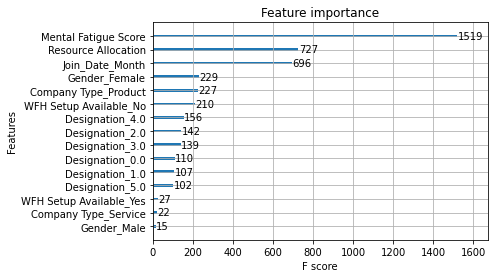

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 2]
plt.show()

#Построение модели LightBoost

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lightgbm as lgb
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train,y_train)
lgb_eval = lgb.Dataset(X_validation,y_validation, reference=lgb_train)

# https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred_3 = gbm.predict(X_validation, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(y_validation, y_pred_3) ** 0.5)

Starting training...
[1]	valid_0's l1: 0.153743	valid_0's l2: 0.0369031
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 0.148224	valid_0's l2: 0.0343267
[3]	valid_0's l1: 0.141689	valid_0's l2: 0.0313817
[4]	valid_0's l1: 0.135532	valid_0's l2: 0.028726
[5]	valid_0's l1: 0.129715	valid_0's l2: 0.0263323
[6]	valid_0's l1: 0.124227	valid_0's l2: 0.0241739
[7]	valid_0's l1: 0.119082	valid_0's l2: 0.0222314
[8]	valid_0's l1: 0.114174	valid_0's l2: 0.0204607
[9]	valid_0's l1: 0.109588	valid_0's l2: 0.0188755
[10]	valid_0's l1: 0.105271	valid_0's l2: 0.0174373
[11]	valid_0's l1: 0.101176	valid_0's l2: 0.0161341
[12]	valid_0's l1: 0.0973385	valid_0's l2: 0.0149517
[13]	valid_0's l1: 0.0937572	valid_0's l2: 0.0138892
[14]	valid_0's l1: 0.0903879	valid_0's l2: 0.0129265
[15]	valid_0's l1: 0.0872359	valid_0's l2: 0.012052
[16]	valid_0's l1: 0.0842793	valid_0's l2: 0.011266
[17]	valid_0's l1: 0.0814966	valid_0's l2: 0.0105543
[18]	valid_0's l1: 0.078917	valid_0's l2

In [ ]:
y_pred_3

array([0.3502493 , 0.6300693 , 0.38426817, ..., 0.54633247, 0.48922728,
       0.40771813])

In [ ]:
mae = np.mean(abs(y_pred_3-y_validation))
rmse = np.sqrt(np.mean((y_pred_3-y_validation)**2))
rae = np.mean(abs(y_pred_3-y_validation))/np.mean(abs(y_validation-np.mean(y_validation)))
rse = np.mean((y_pred_3-y_validation)**2)/np.mean((y_validation-np.mean(y_validation))**2)

In [ ]:
# print metrics on test data
from sklearn.metrics import r2_score
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_validation,y_pred_3)))
print("Mean Absolute Error: {0:0.6f}".format(mae))
print("Root Mean Squared Error: {0:0.6f}".format(rmse))
print("Relative Absolute Error: {0:0.6f}".format(rae))
print("Relative Squared Error: {0:0.6f}".format(rse))

The R-squared value is: 0.9068 

Mean Absolute Error: 0.047818
Root Mean Squared Error: 0.060858
Relative Absolute Error: 0.299706
Relative Squared Error: 0.093193


In [ ]:
# print the R-squared 
from sklearn.metrics import r2_score 
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_train,gbm.predict(X_train)))) 

The R-squared value is: 0.9112 



In [ ]:
# print the R-squared 
from sklearn.metrics import r2_score 
print("The R-squared value is: {0:0.4f} \n".format(r2_score(y_validation,y_pred_3))) 

The R-squared value is: 0.9068 



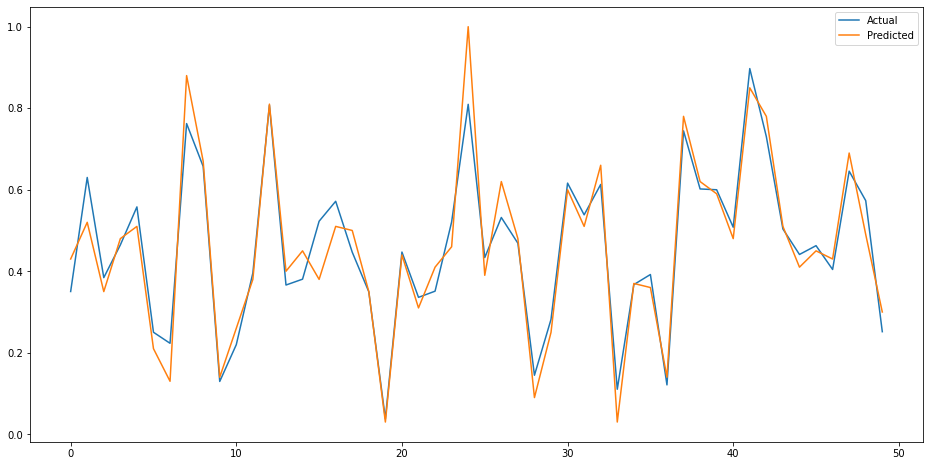

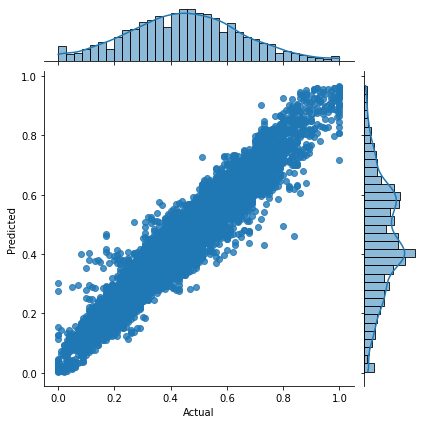

In [ ]:
test = pd.DataFrame({'Predicted':y_pred_3,'Actual':y_validation})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind='reg',);

# **ВЫВОД:**
1. С целью оценить влияние различных факторов на уровень профессионального выгорания ('Burn Rate') были рассмотрены следующие модели (указаны ниже). Оценки коэффициентов детерминации на обучающей и тестовой выборках представлены в скобках: 

# *   LinearRegression (**0.870; 0.873**)
# *   RandomForest (**0.970; 0.886**)
# *   GradientBoostingRegressor (**0.904; 0.902**)
# *   CatBoostRegressor (**0.920; 0.906**)
# *   XGBoost (0.915; 0.906)
# *   LightBoost (0.911; 0.906)


> 



2. **ОЦЕНКИ КАЧЕСТВА МОДЕЛЕЙ ПРОГНОЗА НА ТЕСТОВОЙ ВЫБОРКЕ.** 
Чуть хуже показали себя результаты модели LinearRegression и RandomForest - 0.873 и 0.886 соответственно. 3 модели, обученные с помощью алгоритмов бустинга, оказались одинаково успешными и получили самый высокий коэффициент - 0.906. Таким  образом, данные лучше описывают модели CatBoost, XGBoost и LightBoost.



> 



3. Были проведены разведочный анализ данных (EDA), preprocessing, обучение модели с помощью нескольких алгоритмов, их сравнение и выбор лучшей модели. 




4.С КАКИМИ ФАКТОРАМИ СВЯЗАНО ПРОФЕССИОНАЛЬНЫЕ ВЫГОРАНИЕ

4.1 К **наиболее значимым факторам**, влияющим на уровень профессионального выгорания сотрудника, можно отнести: 'Mental Fatique Score  - **Уровень усталости, истощение**, 'Resourse Allocation' - **Доступ к ресурсам**, 'Designation' - **Уровень занимаемой позиции**. Такой результат можно интерпретировать как чем больше сотрудник получает продвижений по службе и чем большими ресурсами он может распоряжаться, тем более растет уровень его ответственности и, как следствие, постоянного напряжения. Вероятно, связанная с этим усталость, стресс и ведет к профессиональному выгоранию.

4.2 К **среднезначимым,** (по сравнению с первыми двумя факторами они значительно уступают, но тем не менее в разных моделях занимают 3-е по значимости место), отнесем 'WTH Setap Available' - **Опцию удаленной работы** и 'Join_Date_Month - **Продолжительность работы в компании**(в мес.) Возможно, они влияют ситуативно, сильнее проявляясь в зависимости от индивидуальной мотивации и/или статуса сотрудника. Также можем предпопожить, что эти параметры могут явно проявляться в определенном срезе (напр., опред.профессия, должность, семейный статус, статус новичка и др.). Тут возможно углубиться и провести более прицельное исследование с привлечением новых переменных. 


4.3 **Незначимыми** факторами для выгорания можно назвать Тип компании и Пол сотрудника. Но есть интересное наблюдение, что Доступ к ресурсам имеет очень слабую отрицательную корреляцию по отношению к женскому полу. В то время как у мужчин она хоть и также слабая, но всегда положительная.
А также интересно отметить, что сервисные компании, как входной фактор, в большинстве моделей занимали более высокое место по значимости по сравнению с продуктовыми.